In [ ]:
print("hello world");

hello world


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Number of dog images: 278
Number of cat images: 279
Image size: (275, 183)
Image mode: RGB


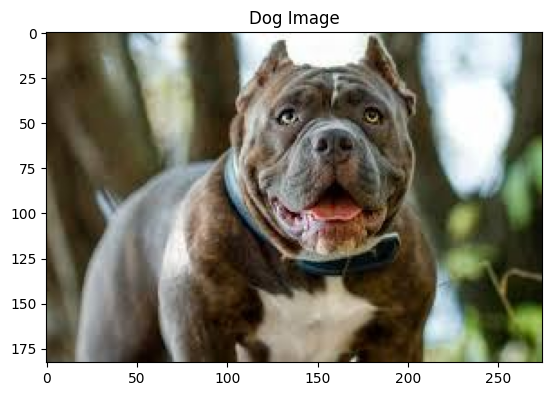

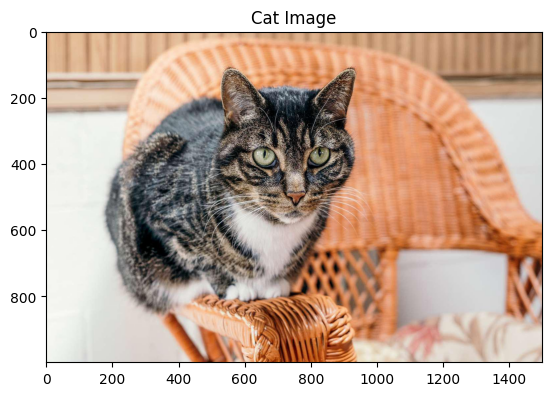

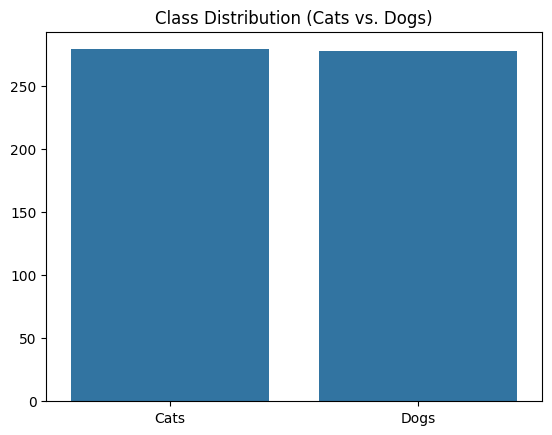

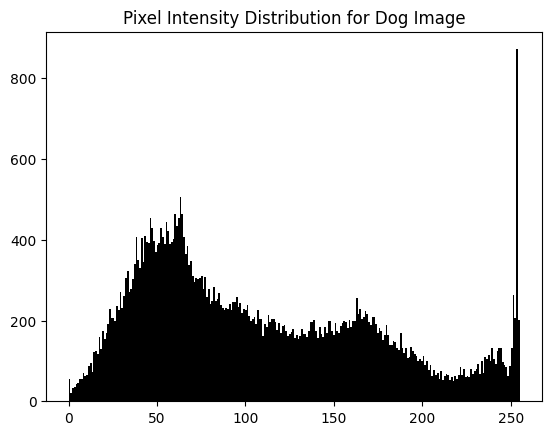

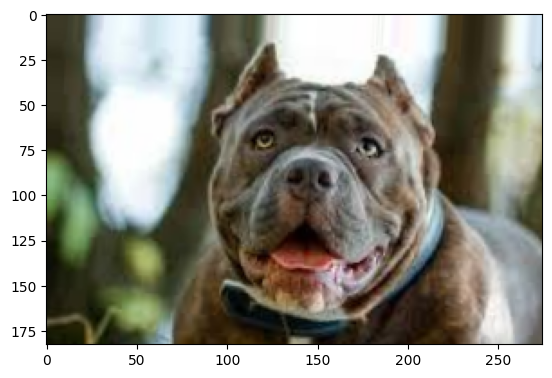

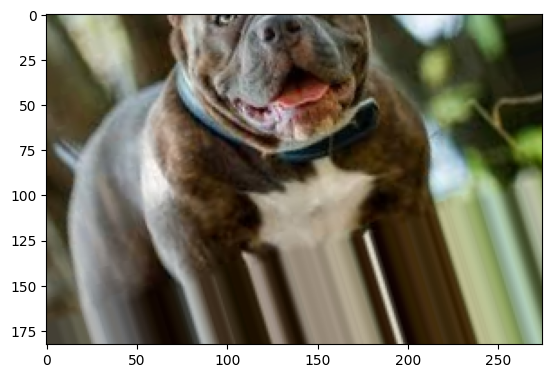

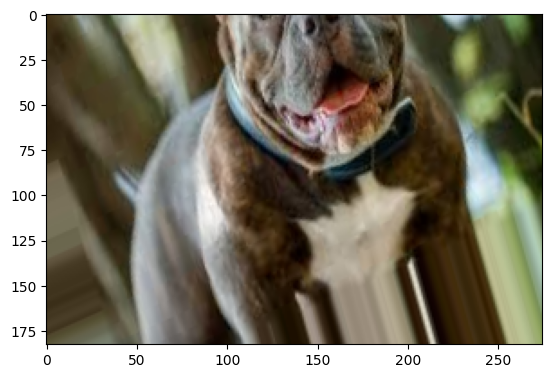

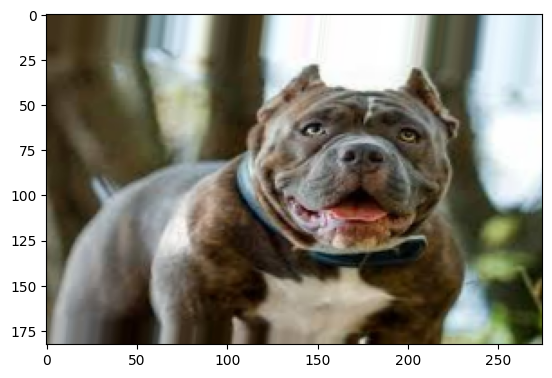

In [10]:
import os # Import the os module
from PIL import Image

# used to visualize and display images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
import matplotlib.pyplot as plt

import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

train_dir = '/content/drive/MyDrive/datasets/images/cats_and_dogs/train/'
test_dir = '/content/drive/MyDrive/datasets/images/cats_and_dogs/test/'

train_dogs_dir = '/content/drive/MyDrive/datasets/images/cats_and_dogs/train/dogs/'
train_cats_dir = '/content/drive/MyDrive/datasets/images/cats_and_dogs/train/cats/'
test_dogs_dir = '/content/drive/MyDrive/datasets/images/cats_and_dogs/test/dogs/'
test_cats_dir = '/content/drive/MyDrive/datasets/images/cats_and_dogs/test/cats/'

# Check the number of images in each folder
print('Number of dog images:', len(os.listdir(train_dogs_dir)))
print('Number of cat images:', len(os.listdir(train_cats_dir)))

# Load a sample dog image
image = Image.open(train_dogs_dir + os.listdir(train_dogs_dir)[0])
print('Image size:', image.size)
print('Image mode:', image.mode)  # Check if it's RGB (3 channels)

# Visualize a dog image
img = mpimg.imread(train_dogs_dir + os.listdir(train_dogs_dir)[0])
plt.imshow(img)
plt.title('Dog Image')
plt.show()

# Visualize a cat image
img = mpimg.imread(train_cats_dir + os.listdir(train_cats_dir)[0])
plt.imshow(img)
plt.title('Cat Image')
plt.show()

# Plot the distribution of images
sns.barplot(x=['Cats', 'Dogs'], y=[len(os.listdir(train_cats_dir)), len(os.listdir(train_dogs_dir))])
plt.title('Class Distribution (Cats vs. Dogs)')
plt.show()

# Convert a sample image to grayscale and plot its intensity distribution
img_gray = cv2.imread(train_dogs_dir + os.listdir(train_dogs_dir)[0], cv2.IMREAD_GRAYSCALE)
plt.hist(img_gray.ravel(), bins=256, color='black')
plt.title('Pixel Intensity Distribution for Dog Image')
plt.show()

datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

img = load_img(train_dogs_dir + os.listdir(train_dogs_dir)[0])
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Display augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break
plt.show()

make 2 separate histogram for all cat and all dog images.

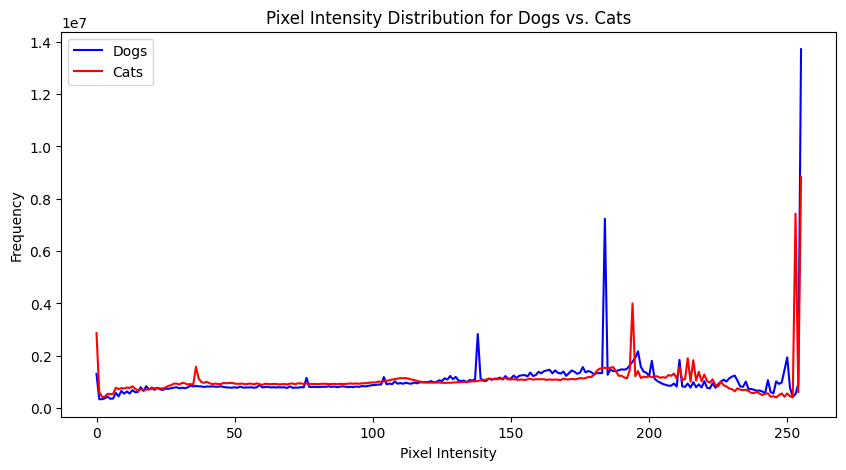

In [11]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def calculate_histogram(directory):
    # Initialize a variable to accumulate the histogram
    hist_sum = np.zeros(256)

    # Iterate over all images in the directory
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

        # Calculate histogram for the image
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])

        # Flatten and add it to the accumulator
        hist_sum += hist.flatten()

    return hist_sum

# Calculate histograms for both dogs and cats
dog_histogram = calculate_histogram(train_dogs_dir)
cat_histogram = calculate_histogram(train_cats_dir)

# Plot histograms for dogs and cats
plt.figure(figsize=(10, 5))


# plotting the histogram
plt.plot(dog_histogram, color='blue', label='Dogs')
plt.plot(cat_histogram, color='red', label='Cats')

plt.title('Pixel Intensity Distribution for Dogs vs. Cats')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


importing the CNN model

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the MobileNetV2 model with pre-trained ImageNet weights, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (optional, to avoid retraining the pre-trained layers)
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer to reduce dimensions
x = Dense(128, activation='relu')(x)  # Dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Final binary classification (cat/dog)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/images/cats_and_dogs/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/images/cats_and_dogs/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model
model.fit(train_generator, validation_data=validation_generator, epochs=5)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8041 - loss: 0.4296 - val_accuracy: 0.9545 - val_loss: 0.1625
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9907 - loss: 0.0458 - val_accuracy: 0.9636 - val_loss: 0.1511
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 1.0000 - loss: 0.0166 - val_accuracy: 0.9636 - val_loss: 0.1833
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.9727 - val_loss: 0.1386
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.9455 - val_loss: 0.2141


now testing the model

In [13]:
# Evaluate model performance on validation data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9542 - loss: 0.2295
Validation Accuracy: 94.55%


testing the model with my dataset

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasets/images/cats_and_dogs/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Found 140 images belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.9363 - loss: 0.2441
Test Accuracy: 92.86%


Make Predictions: Try predicting on a single image to see the model’s output.

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/datasets/images/cats_and_dogs/test/dogs/dog_123.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Convert single image to batch format

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print('Predicted: Dog')
else:
    print('Predicted: Cat')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: Dog


Save the Model: Save your trained model for later use.

In [18]:
model.save('/content/drive/MyDrive/datasets/cats_dogs_classifier.keras')


extending the testing capabilities by adding a external image upload option.